In [1]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import uproot
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os

Welcome to JupyROOT 6.14/06


In [2]:
import util_analysis
from util_analysis import isBadLivetime, isBadrun

In [3]:
run_number=[]
# phi_v=[]
# theta_v=[]
# phi_h=[]
# theta_h=[]
peak_corr=[]
numruns=0
for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/Joined/A3/by_config/c2/"):#Loop over desired directory
    if filename.endswith("3517_joined_bins_6_19.root"):
        continue
    if filename.endswith(".root"): #extension, .root in this case
        f = ROOT.TFile.Open(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/Joined/A3/by_config/c2/", str(filename)))
        numEntries=f.OutputTree_recoRadius_19.GetEntries()
        if numEntries==0:
            continue
        f.OutputTree_recoRadius_19.GetEntry(0)
        if(isBadrun(f.OutputTree_recoRadius_19.run)==True):
            continue
        numruns+=1
        for entry in f.OutputTree_recoRadius_19:
            if entry.isCalpulser==True or entry.isSoftTrigger==True:
                continue
            if isBadLivetime(3,entry.unixTime):
                continue
            run_number.append(entry.run)
            peak_corr.append(entry.peakCorr_single[0])
            
#             theta_v.append(entry.peakTheta_single[0])
#             phi_v.append(entry.peakPhi_single[0])
#             theta_h.append(entry.peakTheta_single[1])
#             phi_h.append(entry.peakPhi_single[1])
            

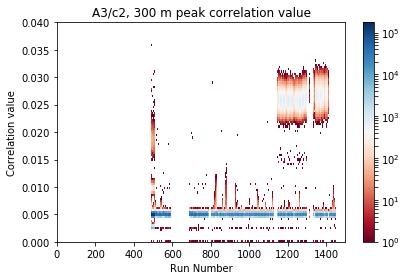

In [11]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

plt.hist2d(run_number,peak_corr,bins=[500,100],norm=mcolors.LogNorm(),cmap='RdBu',range=[[0,1500],[0,0.04]])
# ax[0,0].set_xlim(1400,1910)
plt.title("A3/c2, 300 m peak correlation value")
plt.ylabel("Correlation value")
plt.xlabel("Run Number")
# plt.ylim(0,0.04)
plt.colorbar()
              
plt.tight_layout()
plt.savefig("/users/PCON0003/cond0068/ARA/A3_c2_reco_peakCorrVal.png", dpi=200)

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

phi_hist = ax[0,0].hist2d(run_number,phi_v,bins=[500,100],norm=mcolors.LogNorm(),cmap='RdBu')
# ax[0,0].set_xlim(1400,1910)
ax[0,0].set_title("A3/c3, 41 m reconstructed $\phi$")
ax[0,0].set_ylabel("$\phi$")
ax[0,0].set_xlabel("Run Number")
ax[0,0].set_ylim(-180,180)
fig.colorbar(phi_hist[3],ax=ax[0,0])

theta_hist = ax[0,1].hist2d(run_number,theta_v,bins=[500,50],norm=mcolors.LogNorm(),cmap='RdBu')
# ax[0,1].set_xlim(1400,1910)
ax[0,1].set_ylabel("$\\theta$")
ax[0,1].set_title("A3/c3, 41 m reconstructed $\\theta$")
ax[0,1].set_xlabel("Run Number")
ax[0,1].set_ylim(-90,90)
fig.colorbar(theta_hist[3],ax=ax[0,1])

phi_hist_zoomed = ax[1,0].hist2d(run_number,phi_v,bins=[500,360],norm=mcolors.LogNorm(),cmap='RdBu')
# ax[1,0].set_xlim(1400,1910)
ax[1,0].set_title("A3/c3, 41 m reconstructed $\phi$, zoomed")
ax[1,0].set_ylabel("$\phi$")
ax[1,0].set_xlabel("Run Number")
fig.colorbar(phi_hist_zoomed[3],ax=ax[1,0])
ax[1,0].set_ylim(60,70)

theta_hist_zoomed = ax[1,1].hist2d(run_number,theta_v,bins=[500,180],norm=mcolors.LogNorm(),cmap='RdBu')
# ax[1,1].set_xlim(1400,1910)
ax[1,1].set_ylabel("$\\theta$")
ax[1,1].set_title("A3/c3, 41 m reconstructed $\\theta$, zoomed")
ax[1,1].set_xlabel("Run Number")
ax[1,1].set_ylim(-20,-10)
fig.colorbar(theta_hist_zoomed[3],ax=ax[1,1])

fig.tight_layout()
fig.savefig("/users/PCON0003/cond0068/ARA/A3_c3_reco_calpulsers.png", dpi=200)


In [ ]:
f = ROOT.TFile.Open("/fs/scratch/PAS0654/ara/10pct/Joined/A3/2015/processed_station_3_run_3949_joined_bins_6_19.root")

In [ ]:
f.ls()


In [ ]:
isBadrun(f.OutputTree_recoRadius_6.run)

In [ ]:
isBadLivetime(3,entry.unixTime)